Consider the set of complex sine waves

$$ N_0 = \{ Ae^{i(ax + \alpha)} \mid A,a,\alpha \in \mathbb{R} \} $$

And its linear span

$$ N = \{ \sum_j A_i e^{i(a_j x + \alpha_j)} \} $$

We define a biadditive operation by linearly extending

$$ Ae^{i(ax + \alpha)} \star Be^{i(bx + \beta)} = AB e^{i((a+b)x + \alpha + \beta)} $$

The sad part is, that I didn't realise this is just the usual multiplication and not useful for my purposes.

**Exercise** Show that this is well-defined. (Consider $Ae^{i(ax+\alpha)} = -Ae^{i(ax+\alpha + \pi)}$)

We can embed the complex numbers in $N$, via
$$ \mathbb{C} \ni z = Ae^{i\alpha} \in N $$

In [2]:
% display latex
forget()
x = var('x')
assume(x,'real')
A,a,alpha = var('A a alpha')
assume(A,'real',a,'real',alpha,'real')
B,b,beta = var('B b beta')
assume(B,'real',b,'real',beta,'real')
C,c,gamma = var('C c gamma')
assume(C,'real',c,'real',gamma,'real')

def star1(v,w):
    return vector([v[0]*w[0],w[1],w[2]+v[2]+w[1]*v[1]])

def star(xs,ys):
    res = []
    for x in xs:
        for y in ys:
            res.append(star1(x,y))
    return res

def E1(v):
    return v[0] * exp(I*v[1]*x + I*v[2])

def E(xs):
    return sum([E1(x) for x in xs])


In [3]:
print("Law")
display(star1([A,a,alpha],[B,b,beta]))
print("Scalars")
display(star1([A,0,alpha],[B,b,beta]),
        star1([B,b,beta],[A,0,alpha]))
print("Assocs")
display(star1(star1([A,a,alpha],[B,b,beta]),[C,c,gamma]),
        star1([A,a,alpha],star1([B,b,beta],[C,c,gamma])))
print("Commuts")
display(star1([A,a,alpha],[B,b,beta]),
        star1([B,b,beta],[A,a,alpha]))
print("Bilins")
display(star1(star1([A,0,alpha],[B,b,beta]),[C,c,gamma]),
        star1([B,b,beta],star1([A,0,alpha],[C,c,gamma])),
        star1([A,0,alpha],star1([B,b,beta],[C,c,gamma])))
print("Biadditive")
def plus1(v,w):
    if v[1] == w[1]:
        out = vector([x,x,x])
        z1 = v[0]*exp(I*v[2])
        z2 = w[0]*exp(I*w[2])
        out[0] = abs(z1 + z2)
        out[1] = v[1]
        out[2] = arg(z1 + z2)
        return out
    else:
        return None
display(star1([A,a,alpha],plus1([B,b,beta],[C,b,gamma])),
        plus1(star1([A,a,alpha],[B,b,beta]),star1([A,a,alpha],[C,b,gamma])))
display(star1(plus1([B,b,beta],[C,b,gamma]),[A,a,alpha]),
        plus1(star1([B,b,beta],[A,a,alpha]),star1([C,b,gamma],[A,a,alpha])))

Law


(A*B, b, a*b + alpha + beta)

Scalars


(A*B, b, alpha + beta)

(A*B, 0, alpha + beta)

Assocs


(A*B*C, c, a*b + b*c + alpha + beta + gamma)

(A*B*C, c, a*c + b*c + alpha + beta + gamma)

Commuts


(A*B, b, a*b + alpha + beta)

(A*B, a, a*b + alpha + beta)

Bilins


(A*B*C, c, b*c + alpha + beta + gamma)

(A*B*C, c, b*c + alpha + beta + gamma)

(A*B*C, c, b*c + alpha + beta + gamma)

Biadditive


(A*abs(B*e^(I*beta) + C*e^(I*gamma)), b, a*b + alpha + arg(B*e^(I*beta) + C*e^(I*gamma)))

(abs(A*B*e^(I*a*b + I*alpha + I*beta) + A*C*e^(I*a*b + I*alpha + I*gamma)), b, arg(A*B*e^(I*a*b + I*alpha + I*beta) + A*C*e^(I*a*b + I*alpha + I*gamma)))

(A*abs(B*e^(I*beta) + C*e^(I*gamma)), a, a*b + alpha + arg(B*e^(I*beta) + C*e^(I*gamma)))

(abs(A*B*e^(I*a*b + I*alpha + I*beta) + A*C*e^(I*a*b + I*alpha + I*gamma)), a, arg(A*B*e^(I*a*b + I*alpha + I*beta) + A*C*e^(I*a*b + I*alpha + I*gamma)))

1/8*e^(-I*pi + I*x + 3*I) - 1/8*e^(-I*pi + I*x + I) + 1/8*e^(-I*pi + I*x - I) - 1/8*e^(-I*pi + I*x - 3*I) + 1/8*e^(-I*pi - I*x + 3*I) - 1/8*e^(-I*pi - I*x + I) + 1/8*e^(-I*pi - I*x - I) - 1/8*e^(-I*pi - I*x - 3*I)

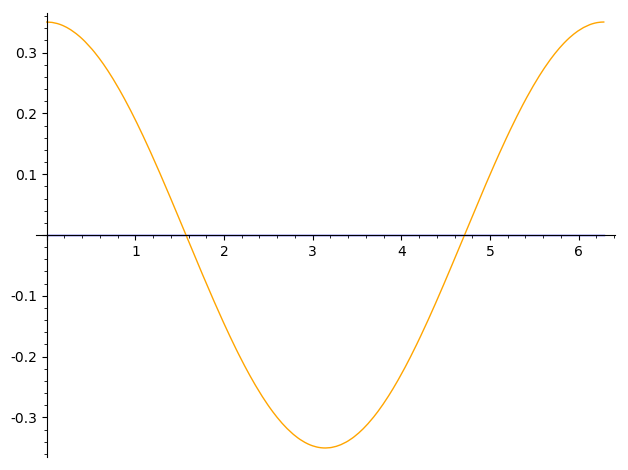

In [4]:
COS = [[1/2,2,0], [1/2,-2,0]]
SIN = [[1/2,1,-pi/2], [-1/2,-1,-pi/2]]

SIN_COS = (star(SIN, COS))
COS_SIN = (star(COS, SIN))
COS_COS = (star(COS, COS))
SIN_SIN = (star(SIN, SIN))
SIN_CS = star(SIN,star(COS,SIN))
SC_SIN = star(star(SIN,COS),SIN)
tgt = E(SIN_CS)
display(tgt)
plot(real(tgt),0,2*pi) +\
    plot(imag(tgt),0,2*pi,color='orange')

1/8*e^(-I*pi + I*x + 4*I) - 1/4*e^(-I*pi + I*x) + 1/8*e^(-I*pi + I*x - 4*I) + 1/8*e^(-I*pi - I*x + 4*I) - 1/4*e^(-I*pi - I*x) + 1/8*e^(-I*pi - I*x - 4*I)

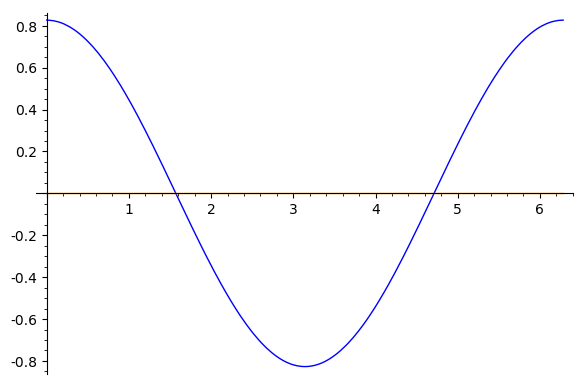

In [5]:
tgt = E(SC_SIN)
display(tgt)
plot(real(tgt),0,2*pi) +\
    plot(imag(tgt),0,2*pi,color='orange')

---------------------
# A new chapter

In [14]:
m = matrix([[cos(x)/2,-1],[1,0]])
v = vector([cos(x),1])
f = lambda j: expand((expand(m^j)*v)[0])
display([f(j) for j in range(5)])

[cos(x),
 1/2*cos(x)^2 - 1,
 1/4*cos(x)^3 - 3/2*cos(x),
 1/8*cos(x)^4 - 5/4*cos(x)^2 + 1,
 1/16*cos(x)^5 - 7/8*cos(x)^3 + 2*cos(x)]